In [1]:
from sklearn import datasets
import pandas as pd

data = datasets.load_iris()

df = pd.DataFrame(data=data['data'],columns= data['feature_names'])
df_tar = pd.DataFrame(data=data['target'],columns=['target'])


In [2]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
corrM = df.corr()

In [5]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Correlation Matrix')

Text(0.5, 1.0, 'Correlation Matrix')

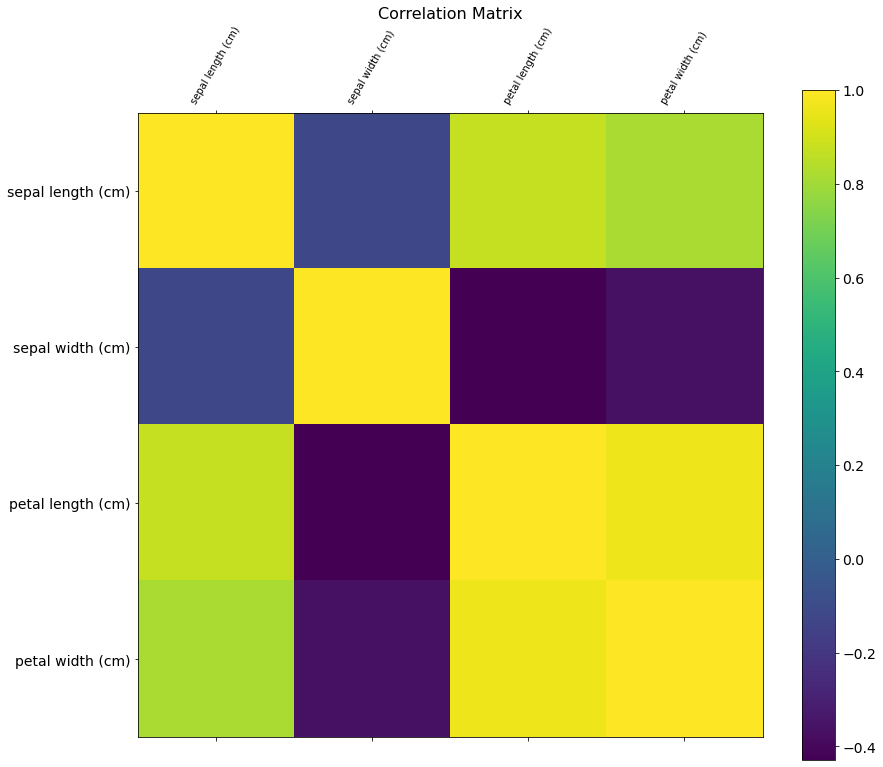

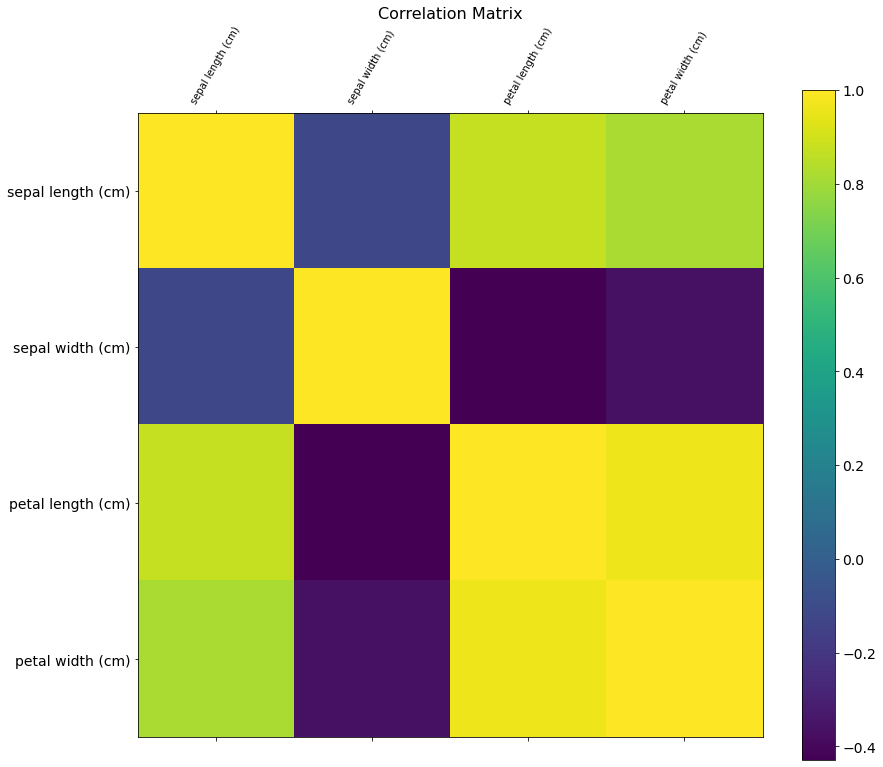

In [6]:
f = plt.figure(figsize=(14, 12))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10, rotation=60)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [7]:
import numpy as np

In [8]:
class LDA:
    def __init__(self, n_components=3):
        self.n_components = n_components
        self.discriminants = np.array([])
    
    def fit(self, X, y):
        # get number of features
        n_features = X.shape[1]
        # get classification classses
        class_labels = np.unique(y)
        # get vector of means 
        mean_tot = np.mean(X, axis=0)
        # initialize dispersion matrixes
        # S_W ... matrix of total scatter of data within classes togeteher
        # S_b ... matrix of total scatter of class means
        S_W, S_B = np.zeros((n_features,n_features)), np.zeros((n_features,n_features))
        # compute scatter matrixes
        for _class in class_labels:
            # get vector X for this class
            X_c = X[y==_class]
            mean_c = np.mean(X_c, axis=0)
            # add scatter of class c to total dispersion
            S_W += (X_c - mean_c).T.dot(X_c - mean_c)
            # add scatter between classes
            class_diff = (mean_c - mean_tot).reshape(n_features, 1)
            S_B += X_c.shape[0] * (class_diff).dot(class_diff.T)
        
        # calculate matrix A ~ S_B / S_W 
        # intuitively, the matrix is high when 
        # - distances between data within clases are low
        # - distances between class means are high
        A = np.linalg.inv(S_W).dot(S_B)
        # get eigenvalues and eigenvectors -> extract most important features for matrix 
        eigenvalues, eigenvectors = np.linalg.eig(A)
        # get indexes of n_components most important eigenvalues in descending order
        idxs = np.argsort(abs(eigenvalues))[::-1][:self.n_components]
        self.discriminants = eigenvectors.T[idxs]
    
    def transform(self, X):
        return np.dot(X, self.discriminants.T)

In [9]:
lda = LDA(3)

In [10]:
lda.fit(data['data'], data['target'])

In [11]:
lda.transform(data['data'])

array([[-1.49920971, -1.88675441,  2.08085611],
       [-1.2643595 , -1.59214275,  1.90965527],
       [-1.35525305, -1.73341462,  1.90017044],
       [-1.18495616, -1.62358806,  1.92780895],
       [-1.5169559 , -1.94476227,  2.09385881],
       [-1.40864014, -2.20148038,  2.16983602],
       [-1.28548339, -1.90177269,  1.88899123],
       [-1.38431399, -1.80218401,  2.07300439],
       [-1.12136823, -1.53021571,  1.80563484],
       [-1.31831374, -1.54860234,  2.06116226],
       [-1.58367182, -1.98077996,  2.21819984],
       [-1.28716445, -1.77562146,  2.07815537],
       [-1.31422036, -1.51454424,  1.9823301 ],
       [-1.37605297, -1.58704672,  1.80001132],
       [-1.94923317, -2.23514437,  2.25692462],
       [-1.77516687, -2.54725756,  2.28522604],
       [-1.63024483, -2.302505  ,  2.02787514],
       [-1.42847467, -1.96369972,  1.99301166],
       [-1.50337736, -2.06783361,  2.27501702],
       [-1.48893461, -2.11442674,  2.11301884],
       [-1.35700838, -1.75428449,  2.204

array([[-1.49920971, -1.88675441,  2.08085611],
       [-1.2643595 , -1.59214275,  1.90965527],
       [-1.35525305, -1.73341462,  1.90017044],
       [-1.18495616, -1.62358806,  1.92780895],
       [-1.5169559 , -1.94476227,  2.09385881],
       [-1.40864014, -2.20148038,  2.16983602],
       [-1.28548339, -1.90177269,  1.88899123],
       [-1.38431399, -1.80218401,  2.07300439],
       [-1.12136823, -1.53021571,  1.80563484],
       [-1.31831374, -1.54860234,  2.06116226],
       [-1.58367182, -1.98077996,  2.21819984],
       [-1.28716445, -1.77562146,  2.07815537],
       [-1.31422036, -1.51454424,  1.9823301 ],
       [-1.37605297, -1.58704672,  1.80001132],
       [-1.94923317, -2.23514437,  2.25692462],
       [-1.77516687, -2.54725756,  2.28522604],
       [-1.63024483, -2.302505  ,  2.02787514],
       [-1.42847467, -1.96369972,  1.99301166],
       [-1.50337736, -2.06783361,  2.27501702],
       [-1.48893461, -2.11442674,  2.11301884],
       [-1.35700838, -1.75428449,  2.204

In [12]:
data = datasets.load_breast_cancer()

In [13]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
lda_brst = LDA(3)

In [16]:
lda_brst.fit(data['data'], data['target'])

In [17]:
reduced_data = lda_brst.transform(data['data'])

C:\Users\jaros\AppData\Roaming\Python\Python38\site-packages\matplotlib\collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
C:\Users\jaros\AppData\Roaming\Python\Python38\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\jaros\AppData\Roaming\Python\Python38\site-packages\matplotlib\collections.py:566: ComplexWarning: Casting complex values to real discards the imaginary part
  (np.asarray(self.convert_xunits(offsets[:, 0]), 'float'),
C:\Users\jaros\AppData\Roaming\Python\Python38\site-packages\matplotlib\collections.py:567: ComplexWarning: Casting complex values to real discards the imaginary part
  np.asarray(self.convert_yunits(offsets[:, 1]), 'float')))
C:\Users\jaros\AppData\Roaming\Python\Python38\site-packages\matplotlib\colors.py:277: ComplexWarning: Casting complex values to real di

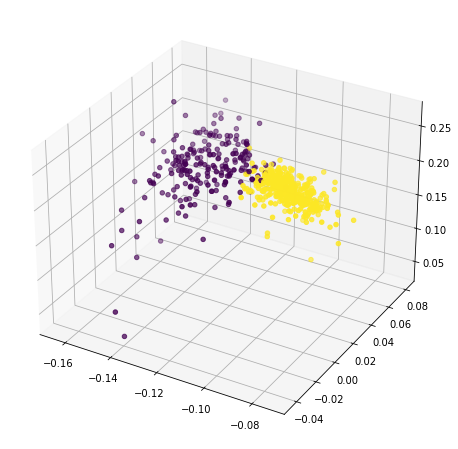

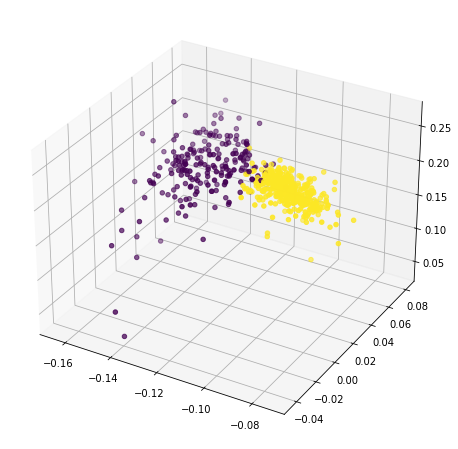

In [18]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection='3d')

ax.scatter3D(reduced_data[:,0],reduced_data[:,1],reduced_data[:,2],c=data['target'])
plt.show()

In [19]:
from collections import Counter

In [20]:
class KNN:
    def __init__(self, K):
        self.K = K
        self.X = np.array([])
        self.y = np.array([])
        
    @staticmethod
    def euclidian_distance(x1, x2):
        return np.sqrt(np.sum(x1 - x2)**2)
    
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)
    
    def _predict(self, x):
        # 1. calculate distances
        distances = [self.euclidian_distance(x, x_train) for x_train in self.X]
        # 2. get get k nearest samples + their labels
        k_indices = np.argsort(distances)[:self.K]
        k_nearest_labels = [self.y[i] for i in k_indices]
        # 3. majority vote, most common class label
        most_common = Counter(k_nearest_labels).most_common(1)[0][0]
        # 4. return most common
        return most_common

In [21]:
knn = KNN(15)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size=0.2, random_state=11)

In [23]:
knn.fit(X_train, y_train)

In [24]:
prediction = knn.predict(X_test)

In [25]:
prediction

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0])

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0])

In [26]:
y_test

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0])

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0])

In [27]:
def accuracy(true_values, predictions):
    N = true_values.shape[0]
    accuracy = (true_values == predictions).sum() / N
    TP = ((predictions == 1) & (true_values == 1)).sum()
    FP = ((predictions == 1) & (true_values == 0)).sum()
    precision = TP / (TP+FP)
    return precision

In [28]:
accuracy(y_test, prediction)

0.926829268292683

0.926829268292683